<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Canales%20de%20Youtube/Sentdex/Pytorch/Taller5%2C_6%2C_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import zipfile
from tqdm import tqdm
from google.colab import files

In [ ]:
# Para importar una imagen a google colab

from google.colab import files
import cv2

upload = files.upload()

Saving small_database.zip to small_database.zip


In [ ]:
!ls
!unzip small_database.zip

sample_data  small_database.zip  training_data.npy
Archive:  small_database.zip
   creating: small_database/
   creating: small_database/PetImages/
   creating: small_database/PetImages/Cat/
  inflating: small_database/PetImages/Cat/0.jpg  
  inflating: small_database/PetImages/Cat/1.jpg  
  inflating: small_database/PetImages/Cat/10.jpg  
  inflating: small_database/PetImages/Cat/100.jpg  
  inflating: small_database/PetImages/Cat/1000.jpg  
  inflating: small_database/PetImages/Cat/1001.jpg  
  inflating: small_database/PetImages/Cat/1002.jpg  
  inflating: small_database/PetImages/Cat/1003.jpg  
  inflating: small_database/PetImages/Cat/1004.jpg  
  inflating: small_database/PetImages/Cat/1005.jpg  
  inflating: small_database/PetImages/Cat/1006.jpg  
  inflating: small_database/PetImages/Cat/1007.jpg  
  inflating: small_database/PetImages/Cat/1008.jpg  
  inflating: small_database/PetImages/Cat/1009.jpg  
  inflating: small_database/PetImages/Cat/101.jpg  
  inflating: small_datab

In [ ]:
!ls


sample_data  small_database  small_database.zip  training_data.npy


In [ ]:
os.listdir('small_database/PetImages/Cat')

In [ ]:
REBUILD_DATA = True

class DogVSCats():
  IMG_SIZE = 50
  CATS = 'small_database/PetImages/Cat'
  DOGS = 'small_database/PetImages/Dog'
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catcount = 0
  dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:

      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.catcount += 1

          elif label == self.DOGS:
            self.dogcount += 1

        except Exception as e:
          pass
    np.random.shuffle(self.training_data)
    np.save('training_data.npy', self.training_data)
    print('Cats: ', self.catcount)
    print('Dogs: ', self.dogcount)

if REBUILD_DATA:
  dogvcats = DogVSCats()
  dogvcats.make_training_data()      





100%|██████████| 2001/2001 [00:02<00:00, 942.31it/s]

Cats:  1996
Dogs:  1999



/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
!ls

sample_data  small_database  small_database.zip  training_data.npy


In [ ]:
training_data = np.load('training_data.npy', allow_pickle=True)

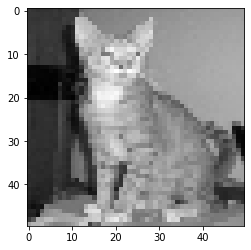

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap='gray')
plt.show()

In [ ]:
#descargar
files.download('training_data.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#cargar
upload = files.upload()

Saving training_data.npy to training_data.npy


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    x = torch.randn(50, 50).view(-1, 1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)

  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

    #print(x[0].shape)
    if self._to_linear is None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
    return x
  
  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return F.softmax(x, dim=1)

net = Net()


In [ ]:
# cargar los datos para entrenamiento
training_data = np.load('training_data.npy', allow_pickle=True)
#print(len(training_data))

In [ ]:

import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
#print(val_size)

In [ ]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]




In [ ]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
  for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
    #print(i, i+BATCH_SIZE)
    batch_X =train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
    batch_y =train_y[i:i+BATCH_SIZE]

    #print('batch_X.shape ', batch_X.shape)
    #print('batch_y.shape ', batch_y.shape)

    net.zero_grad()
    outputs = net(batch_X)
    loss = loss_function(outputs, batch_y)
    loss.backward()
    optimizer.step()

print(loss)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for i in tqdm(range(len(test_X))):
    real_class = torch.argmax(test_y[i])
    net_out = net(test_X[i].view(-1, 1, 50, 50))[0]
    
    predicted_class = torch.argmax(net_out)
    if predicted_class == real_class:
      correct += 1
    total += 1

print('accuracy: ', round(correct/total, 3))

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.device_count()

In [ ]:
net.to(device)

In [ ]:
BATCH_SIZE = 100
def train(net):
  optimizer = optim.Adam(net.parameters(), lr=0.001)
  loss_function = nn.MSELoss()
  for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
   
      batch_X =train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50).to(device)
      batch_y =train_y[i:i+BATCH_SIZE].to(device)

      net.zero_grad()

      outputs = net(batch_X)
      loss = loss_function(outputs, batch_y)
      loss.backward()
      optimizer.step()

    print(f'Epoch: {epoch}. Loss: {loss}')

EPOCHS = 100

train(net)


In [ ]:
def test(net):
  correct = 0
  total = 0
  with torch.no_grad():
    for i in tqdm(range(len(test_X))):
      real_class = torch.argmax(test_y[i]).to(device)
      net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]      
      predicted_class = torch.argmax(net_out)

      if predicted_class == real_class:
        correct += 1
      total += 1

  print('accuracy: ', round(correct/total, 3))

test(net)